In [1]:
import numpy as np
from tensorflow.keras.optimizers import Adam
from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Sequential
import tensorflow as tf
import tensorflow.keras.applications.mobilenet
import os
import PIL
import cv2
import keras
import matplotlib.pyplot as plt
from keras import layers
from keras import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

IMG_SAVE_PATH_Test = 'dataset/test'

# Get a list of folder names in the directory
folders = [name for name in os.listdir(IMG_SAVE_PATH_Test) if os.path.isdir(os.path.join(IMG_SAVE_PATH_Test, name))]

# Create a dictionary with index as key and folder name as value
folders_dict = {folder: index for index, folder in enumerate(folders)}
folders_dict

Str_to_Int = folders_dict

NUM_CLASSES = 8
def str_to_Int_mapper(val):
    return Str_to_Int[val]



def preprocess(IMG_SAVE_PATH):
    dataset = []
    for directory in os.listdir(IMG_SAVE_PATH):
        path = os.path.join(IMG_SAVE_PATH, directory)
        for image in os.listdir(path):
            new_path = os.path.join(path, image)
            try:
                imgpath=PIL.Image.open(new_path)
                imgpath=imgpath.convert('RGB')
                img = np.asarray(imgpath)
                img = cv2.resize(img, (331,331))
                img=img/255.
                dataset.append([img, directory])
            except FileNotFoundError:
                print('Image file not found. Skipping...')
    return dataset
traindata=preprocess(IMG_SAVE_PATH_Test)

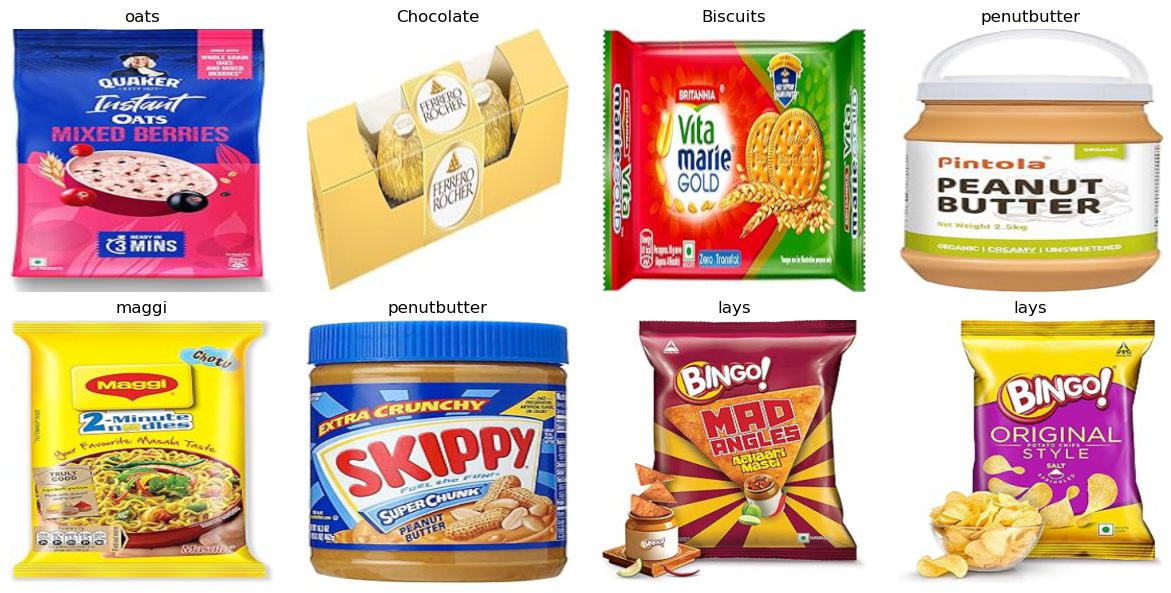

In [2]:
xtest, labelstest = zip(*traindata)

import matplotlib.pyplot as plt
import random

# Randomly select 8 indices from the dataset
indices = random.sample(range(len(xtest)), 8)

# Set up the plot grid
plt.figure(figsize=(12, 6))

# Loop through the selected indices
for i, idx in enumerate(indices):
    plt.subplot(2, 4, i + 1)  # 2 rows, 4 columns
    plt.imshow(xtest[idx])  # Assuming data[idx] is an image
    plt.title(labelstest[idx])
    plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()


In [3]:
model = tf.keras.models.load_model('foodlabel.h5')
model.summary()

ValueError: Unknown layer: 'CustomScaleLayer'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

 activation_24 (Activation)     (None, 39, 39, 32)   0           ['batch_normalization_21[0][0]'] 
                                                                                                  
 conv2d_22 (Conv2D)             (None, 39, 39, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_25 (Conv2D)             (None, 39, 39, 48)   13824       ['activation_24[0][0]']          
                                                                                                  
 batch_normalization_19 (BatchN  (None, 39, 39, 32)  96          ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_22 (BatchN  (None, 39, 39, 48)  144         ['conv2d_25[0][0]']              
 ormalizat

                                                                                                  
 activation_27 (Activation)     (None, 39, 39, 32)   0           ['batch_normalization_24[0][0]'] 
                                                                                                  
 activation_29 (Activation)     (None, 39, 39, 32)   0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 activation_32 (Activation)     (None, 39, 39, 64)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 39, 39, 128)  0           ['activation_27[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'activation_32[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_40 (BatchN  (None, 39, 39, 48)  144         ['conv2d_43[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_40 (Activation)     (None, 39, 39, 32)   0           ['batch_normalization_37[0][0]'] 
                                                                                                  
 activation_43 (Activation)     (None, 39, 39, 48)   0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_39 (Conv2D)             (None, 39, 39, 32)   10240       ['block35_4_ac[0][0]']           
          

 block35_6_mixed (Concatenate)  (None, 39, 39, 128)  0           ['activation_45[0][0]',          
                                                                  'activation_47[0][0]',          
                                                                  'activation_50[0][0]']          
                                                                                                  
 block35_6_conv (Conv2D)        (None, 39, 39, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 39, 39, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 39, 39, 320)  0           ['block35_6[0][0]']              
          

 activation_61 (Activation)     (None, 39, 39, 48)   0           ['batch_normalization_58[0][0]'] 
                                                                                                  
 conv2d_57 (Conv2D)             (None, 39, 39, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_59 (Conv2D)             (None, 39, 39, 32)   9216        ['activation_58[0][0]']          
                                                                                                  
 conv2d_62 (Conv2D)             (None, 39, 39, 64)   27648       ['activation_61[0][0]']          
                                                                                                  
 batch_normalization_54 (BatchN  (None, 39, 39, 32)  96          ['conv2d_57[0][0]']              
 ormalization)                                                                                    
          

                                                                  'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 39, 39, 320)  0           ['block35_9[0][0]']              
                                                                                                  
 conv2d_72 (Conv2D)             (None, 39, 39, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_69 (BatchN  (None, 39, 39, 32)  96          ['conv2d_72[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_72 (Activation)     (None, 39, 39, 32)   0           ['batch_normalization_69[0][0]'] 
          

 activation_78 (Activation)     (None, 19, 19, 384)  0           ['batch_normalization_75[0][0]'] 
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 19, 19, 320)  0          ['block35_10_ac[0][0]']          
                                                                                                  
 mixed_6a (Concatenate)         (None, 19, 19, 1088  0           ['activation_75[0][0]',          
                                )                                 'activation_78[0][0]',          
                                                                  'max_pooling2d_5[0][0]']        
                                                                                                  
 conv2d_80 (Conv2D)             (None, 19, 19, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_nor

                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 19, 19, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_88 (Conv2D)             (None, 19, 19, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_85 (BatchN  (None, 19, 19, 128)  384        ['conv2d_88[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_96 (Conv2D)             (None, 19, 19, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_93 (BatchN  (None, 19, 19, 128)  384        ['conv2d_96[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_96 (Activation)     (None, 19, 19, 128)  0           ['batch_normalization_93[0][0]'] 
                                                                                                  
 conv2d_97 (Conv2D)             (None, 19, 19, 160)  143360      ['activation_96[0][0]']          
          

                                                                                                  
 batch_normalization_101 (Batch  (None, 19, 19, 128)  384        ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_104 (Activation)    (None, 19, 19, 128)  0           ['batch_normalization_101[0][0]']
                                                                                                  
 conv2d_105 (Conv2D)            (None, 19, 19, 160)  143360      ['activation_104[0][0]']         
                                                                                                  
 batch_normalization_102 (Batch  (None, 19, 19, 160)  480        ['conv2d_105[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 activation_112 (Activation)    (None, 19, 19, 128)  0           ['batch_normalization_109[0][0]']
                                                                                                  
 conv2d_113 (Conv2D)            (None, 19, 19, 160)  143360      ['activation_112[0][0]']         
                                                                                                  
 batch_normalization_110 (Batch  (None, 19, 19, 160)  480        ['conv2d_113[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_113 (Activation)    (None, 19, 19, 160)  0           ['batch_normalization_110[0][0]']
                                                                                                  
 conv2d_11

 conv2d_121 (Conv2D)            (None, 19, 19, 160)  143360      ['activation_120[0][0]']         
                                                                                                  
 batch_normalization_118 (Batch  (None, 19, 19, 160)  480        ['conv2d_121[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_121 (Activation)    (None, 19, 19, 160)  0           ['batch_normalization_118[0][0]']
                                                                                                  
 conv2d_119 (Conv2D)            (None, 19, 19, 192)  208896      ['block17_10_ac[0][0]']          
                                                                                                  
 conv2d_122 (Conv2D)            (None, 19, 19, 192)  215040      ['activation_121[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_129 (Activation)    (None, 19, 19, 160)  0           ['batch_normalization_126[0][0]']
                                                                                                  
 conv2d_127 (Conv2D)            (None, 19, 19, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_130 (Conv2D)            (None, 19, 19, 192)  215040      ['activation_129[0][0]']         
                                                                                                  
 batch_normalization_124 (Batch  (None, 19, 19, 192)  576        ['conv2d_127[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_135 (Conv2D)            (None, 19, 19, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_138 (Conv2D)            (None, 19, 19, 192)  215040      ['activation_137[0][0]']         
                                                                                                  
 batch_normalization_132 (Batch  (None, 19, 19, 192)  576        ['conv2d_135[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_135 (Batch  (None, 19, 19, 192)  576        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
          

 conv2d_146 (Conv2D)            (None, 19, 19, 192)  215040      ['activation_145[0][0]']         
                                                                                                  
 batch_normalization_140 (Batch  (None, 19, 19, 192)  576        ['conv2d_143[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_143 (Batch  (None, 19, 19, 192)  576        ['conv2d_146[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_143 (Activation)    (None, 19, 19, 192)  0           ['batch_normalization_140[0][0]']
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_151 (Batch  (None, 19, 19, 192)  576        ['conv2d_154[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_151 (Activation)    (None, 19, 19, 192)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 activation_154 (Activation)    (None, 19, 19, 192)  0           ['batch_normalization_151[0][0]']
                                                                                                  
 block17_19_mixed (Concatenate)  (None, 19, 19, 384)  0          ['activation_151[0][0]',         
          

 activation_159 (Activation)    (None, 19, 19, 256)  0           ['batch_normalization_156[0][0]']
                                                                                                  
 activation_161 (Activation)    (None, 19, 19, 256)  0           ['batch_normalization_158[0][0]']
                                                                                                  
 activation_164 (Activation)    (None, 19, 19, 288)  0           ['batch_normalization_161[0][0]']
                                                                                                  
 conv2d_160 (Conv2D)            (None, 9, 9, 384)    884736      ['activation_159[0][0]']         
                                                                                                  
 conv2d_162 (Conv2D)            (None, 9, 9, 288)    663552      ['activation_161[0][0]']         
                                                                                                  
 conv2d_16

                                                                                                  
 activation_172 (Activation)    (None, 9, 9, 224)    0           ['batch_normalization_169[0][0]']
                                                                                                  
 conv2d_170 (Conv2D)            (None, 9, 9, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_173 (Conv2D)            (None, 9, 9, 256)    172032      ['activation_172[0][0]']         
                                                                                                  
 batch_normalization_167 (Batch  (None, 9, 9, 192)   576         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 batch_normalization_175 (Batch  (None, 9, 9, 192)   576         ['conv2d_178[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_178 (Batch  (None, 9, 9, 256)   768         ['conv2d_181[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_178 (Activation)    (None, 9, 9, 192)    0           ['batch_normalization_175[0][0]']
                                                                                                  
 activation_181 (Activation)    (None, 9, 9, 256)    0           ['batch_normalization_178[0][0]']
                                                                                                  
 block8_4_

                                                                                                  
 activation_189 (Activation)    (None, 9, 9, 256)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 9, 9, 448)    0           ['activation_186[0][0]',         
                                                                  'activation_189[0][0]']         
                                                                                                  
 block8_6_conv (Conv2D)         (None, 9, 9, 2080)   933920      ['block8_6_mixed[0][0]']         
                                                                                                  
 block8_6 (Lambda)              (None, 9, 9, 2080)   0           ['block8_5_ac[0][0]',            
                                                                  'block8_6_conv[0][0]']          
          

                                                                                                  
 block8_8 (Lambda)              (None, 9, 9, 2080)   0           ['block8_7_ac[0][0]',            
                                                                  'block8_8_conv[0][0]']          
                                                                                                  
 block8_8_ac (Activation)       (None, 9, 9, 2080)   0           ['block8_8[0][0]']               
                                                                                                  
 conv2d_199 (Conv2D)            (None, 9, 9, 192)    399360      ['block8_8_ac[0][0]']            
                                                                                                  
 batch_normalization_196 (Batch  (None, 9, 9, 192)   576         ['conv2d_199[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_1 (Conv2D)              (None, 162, 162, 32  9248        ['max_pooling2d[0][0]']          
                                )                                                                 
                                                                                                  
 block8_10_mixed (Concatenate)  (None, 9, 9, 448)    0           ['activation_202[0][0]',         
                                                                  'activation_205[0][0]']         
                                                                                                  
 activation_1 (Activation)      (None, 162, 162, 32  0           ['conv2d_1[0][0]']               
                                )                                                                 
                                                                                                  
 block8_10

In [ ]:
temp1 = list(map(str_to_Int_mapper, labelstest))
xtest=np.array(xtest)
ytest = tensorflow.keras.utils.to_categorical(temp1)
Y=np.array(ytest)



In [ ]:
Y_pred = model.predict([xtest, xtest])


In [ ]:
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_pred_max_prob = np.max(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y,axis = 1)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix
import itertools
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(8))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming Y_true and Y_pred_classes are defined
# Y_true: Actual labels
# Y_pred_classes: Predicted labels

# Compute accuracy
accuracy = accuracy_score(Y_true, Y_pred_classes)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(Y_true, Y_pred_classes, average='weighted')
print("Precision:", precision)

# Compute recall
recall = recall_score(Y_true, Y_pred_classes, average='weighted')
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(Y_true, Y_pred_classes, average='weighted')
print("F1 Score:", f1)
